In [3]:
import pandas as pd

In [92]:
df_llegadas = pd.read_csv('tiempos de llegada.csv', sep=',')

In [93]:
df_llegadas['timestamp'] = pd.to_datetime(df_llegadas['@timestamp'], format="%b %d, %Y @ %H:%M:%S.%f")

In [94]:
# Calcular diferencias de tiempo en milisegundos
df_llegadas = df_llegadas.sort_values(by='timestamp')
df_llegadas['interarrival_times_ms'] = df_llegadas['timestamp'].diff().dt.total_seconds()*1000

# Eliminar el primer valor NaN
df_llegadas = df_llegadas.dropna()


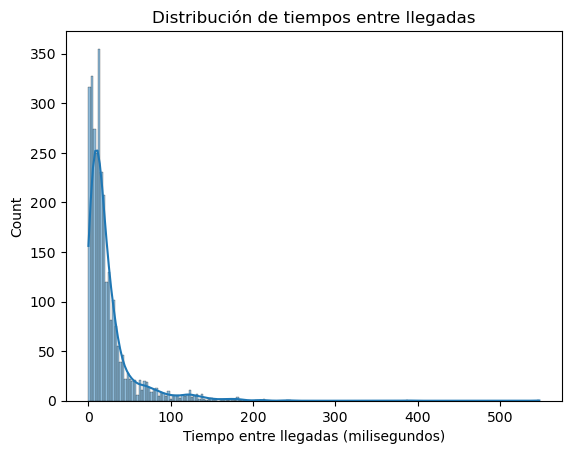

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la distribución
sns.histplot(df_llegadas['interarrival_times_ms'], kde=True)
plt.xlabel('Tiempo entre llegadas (milisegundos)')
plt.title('Distribución de tiempos entre llegadas')
plt.show()

In [78]:
#Importamos fitter
from fitter import Fitter

In [95]:
f = Fitter(df_llegadas.interarrival_times_ms)
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
wald,0.000183,2343.665649,2355.677050,inf,0.043743,2.012856e-05
laplace_asymmetric,0.000190,2949.195519,2967.212621,inf,0.088296,8.716165e-21
burr12,0.000191,2030.209002,2054.231805,inf,0.055306,2.066016e-08
exponnorm,0.000194,2955.671435,2973.688537,inf,0.082291,4.149861e-18
gibrat,0.000196,2015.281227,2027.292629,inf,0.057955,3.403443e-09
genexpon,0.000198,2934.675126,2964.703629,inf,0.087372,2.313674e-20
expon,0.000198,2928.664546,2940.675947,inf,0.087374,2.309213e-20
mielke,0.000203,1908.322811,1932.345614,inf,0.078583,1.501724e-16
johnsonsu,0.000208,1995.388934,2019.411736,inf,0.061500,2.669841e-10
powerlognorm,0.000209,2112.492684,2136.515487,inf,0.055714,1.573929e-08


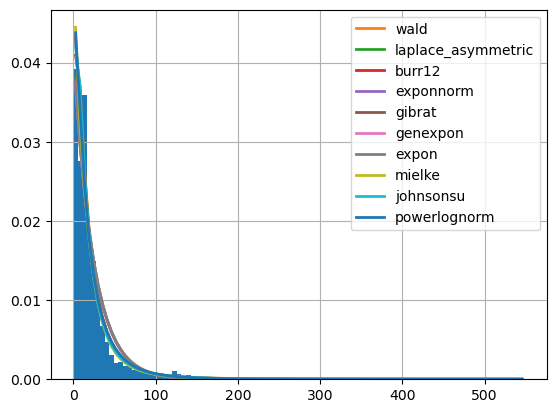

In [96]:
f.summary(10)

In [97]:
# Obtengo los parámetros de la mejor fdp
f.get_best(method='sumsquare_error')

{'wald': {'loc': -3.302065280807085, 'scale': 26.272413492938348}}

In [98]:
loc = -3.302065280807085
scale = 26.272413492938348

In [102]:
from scipy import stats

f_verif = stats.wald.rvs(loc=loc, scale=scale, size=3000, random_state=None)

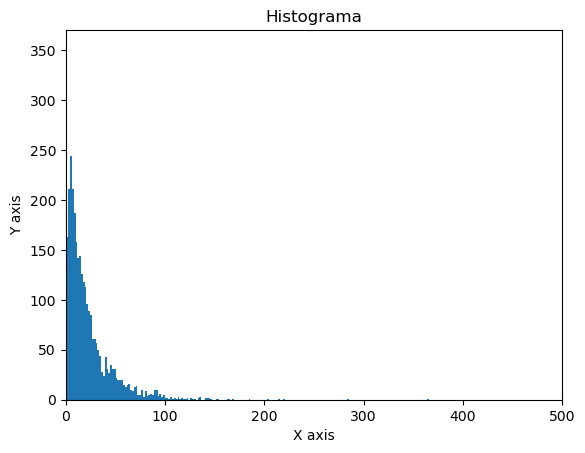

In [103]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 500)
plt.ylim(0, 370)
plt.hist(f_verif, bins=200)
plt.show()

In [104]:
v = Fitter(f_verif)
v.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
geninvgauss,0.000026,1958.584222,1982.609692,inf,0.011856,0.788315
fatiguelife,0.000028,2032.581038,2050.600140,inf,0.015814,0.436634
invgauss,0.000030,1900.674459,1918.693562,inf,0.017094,0.340799
wald,0.000030,1896.816090,1908.828825,inf,0.017286,0.327668
norminvgauss,0.000030,1901.425443,1925.450914,inf,0.017484,0.314560
johnsonsb,0.000031,1897.210316,1921.235786,inf,0.011970,0.778551
johnsonsu,0.000035,1795.504197,1819.529667,inf,0.016103,0.413728
exponweib,0.000038,1855.360755,1879.386225,inf,0.015275,0.481153
gibrat,0.000044,1728.231482,1740.244218,inf,0.020793,0.147311
powerlognorm,0.000046,1772.877484,1796.902955,inf,0.021227,0.132011


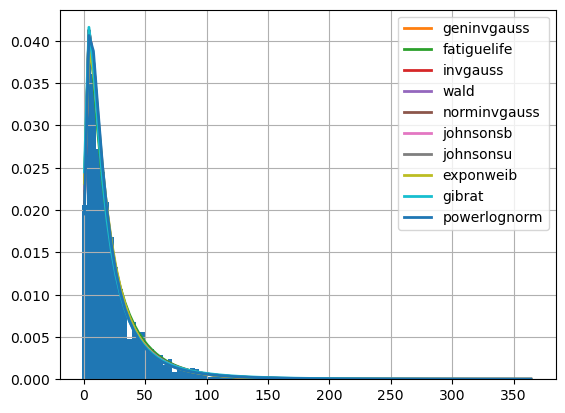

In [105]:
v.summary(10)